## Importing necessary libraries

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


### Reading the Data set

In [44]:
space = pd.read_csv('Space_Corrected.csv')

..............................................................................................................................................................................................................................................................

## DATA CLEANING

In [45]:
space.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### The unnamed columns are redundant, so we remove them

In [46]:
space.drop([space.columns[0], space.columns[1]], axis = 1, inplace = True)

In [47]:
space.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [50]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


#### Renaming some columns for ease referencing

In [243]:
space.rename(columns = {'Datum': 'Date & Time', 'Location': 'Location of launch', 'Rocket': 'Cost of Mission', 
                        'Detail': 'Rocket Name', 'Status Rocket': 'Current Status of Rocket',
                        'Status Mission': 'Mission Status'}, inplace = True)

In [242]:
space.head()

,Company Name,Location of launch,Date & Time,Rocket Name,Current Status of Rocket,Cost of Mission,Mission Status,Launch date,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30,2020,USA


#### Retrieving the date and year from the date and time column

In [62]:
space['Launch date'] = pd.to_datetime(space['Date & Time'])
space['Launch date'] = space['Launch date'].astype(str)

space['Launch date'] = space['Launch date'].str.split(' ',expand=True)[0]
space['Launch date'] = pd.to_datetime(space['Launch date'])

space['Year'] = space['Launch date'].dt.year

In [63]:
space.head()

,Company Name,Location of launch,Date & Time,Rocket Name,Current Status of Rocket,Rocket,Mission Status,Launch date,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30,2020


#### Retrieving the Country name from the location of launch.

In [70]:
space['Country'] = space['Location of launch'].apply(lambda location: location.split(',')[-1])

In [71]:
space.head()

,Company Name,Location of launch,Date & Time,Rocket Name,Current Status of Rocket,Rocket,Mission Status,Launch date,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30,2020,USA


In [74]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Company Name              4324 non-null   object        
 1   Location of launch        4324 non-null   object        
 2   Date & Time               4324 non-null   object        
 3   Rocket Name               4324 non-null   object        
 4   Current Status of Rocket  4324 non-null   object        
 5    Rocket                   964 non-null    object        
 6   Mission Status            4324 non-null   object        
 7   Launch date               4324 non-null   datetime64[ns]
 8   Year                      4324 non-null   int64         
 9   Country                   4324 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 337.9+ KB


#### Percentage null values in the dataset

In [85]:
missing_percent = space.isnull().sum()*100/len(space)
missing_value_space = pd.DataFrame ({'column': space.columns, 'percent': missing})
missing_value_space.reset_index(drop = True, inplace = True)
missing_value_space

,column,percent
0,Company Name,0.000000
1,Location of launch,0.000000
2,Date & Time,0.000000
3,Rocket Name,0.000000
4,Current Status of Rocket,0.000000
5,Cost of Mission,77.705828
6,Mission Status,0.000000
7,Launch date,0.000000
8,Year,0.000000
9,Country,0.000000


#### From the result above, only the cost of mission column has missting data of about 80%. This is really large so I will not include this column in my analysis. 

# DATA VISUALIZATION

## Rocket launching over the years

In [244]:
year_detail = space['Year'].value_counts()
year_detail

1971    119
2018    117
1977    114
1976    113
1975    113
       ... 
2005     37
2010     37
1958     28
1959     20
1957      3
Name: Year, Length: 64, dtype: int64

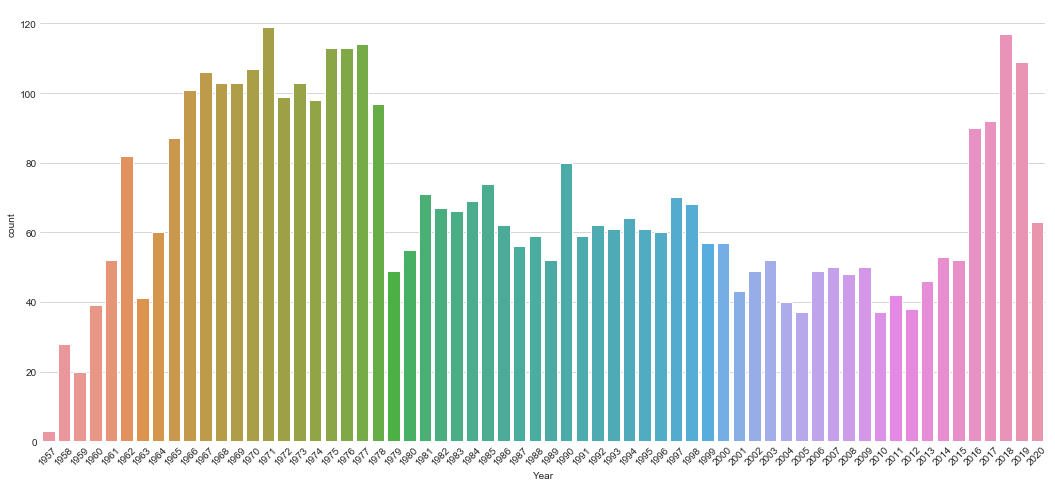

In [245]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
ax = sns.countplot(x=space['Year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

..............................................................................................................................................................................................................................................................

## Mission status of rockets

In [220]:
mission_status = space['Mission Status'].value_counts()
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission Status, dtype: int64

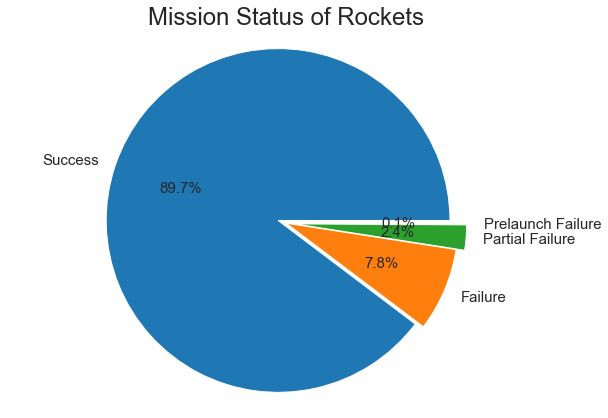

In [240]:
fig = plt.figure(figsize = (10,7))
explode = (0.05, 0, 0.05, 0.05)
plt.pie(mission_status.values, labels = mission_status.index, explode = explode, 
        autopct = '%1.01f%%', shadow = False, textprops={'fontsize': 15})
plt.title('Mission Status of Rockets', fontsize = 24)
plt.axis('equal')
plt.show()

..............................................................................................................................................................................................................................................................

## Number of Active and Retired Rockets

In [246]:
rocket_status = space['Current Status of Rocket'].value_counts()
rocket_status

StatusRetired    3534
StatusActive      790
Name: Current Status of Rocket, dtype: int64

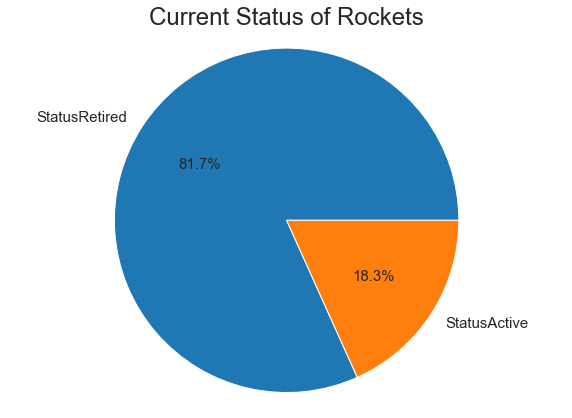

In [239]:
fig = plt.figure(figsize = (10,7))
plt.pie(rocket_status.values, labels = rocket_status.index, autopct = '%1.01f%%', shadow = False, textprops={'fontsize': 15})
plt.title('Current Status of Rockets', fontsize = 24)
plt.axis('equal')
plt.show()

..............................................................................................................................................................................................................................................................

## Top 10 Countries

In [119]:
top_10_countries = space['Country'].value_counts()[:10]
top_10_countries



 Russia           1395
 USA              1344
 Kazakhstan        701
 France            303
 China             268
 Japan             126
 India              76
 Pacific Ocean      36
 Iran               13
 New Zealand        13
Name: Country, dtype: int64

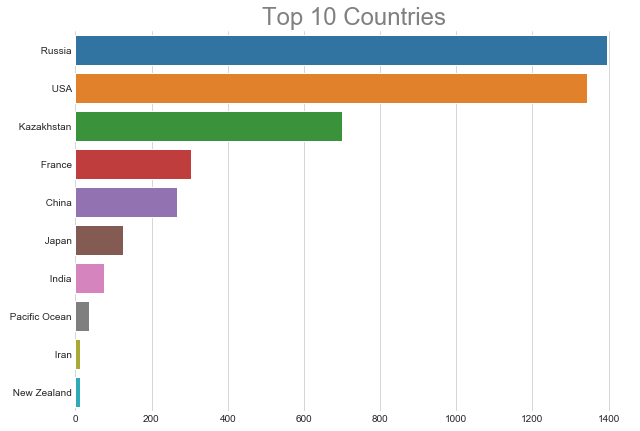

In [247]:
fig = plt.figure(figsize = (10,7))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)
plt.title('Top 10 Countries', size = 24, color = 'grey')
plt.show()

..............................................................................................................................................................................................................................................................

## Rocket launches per country

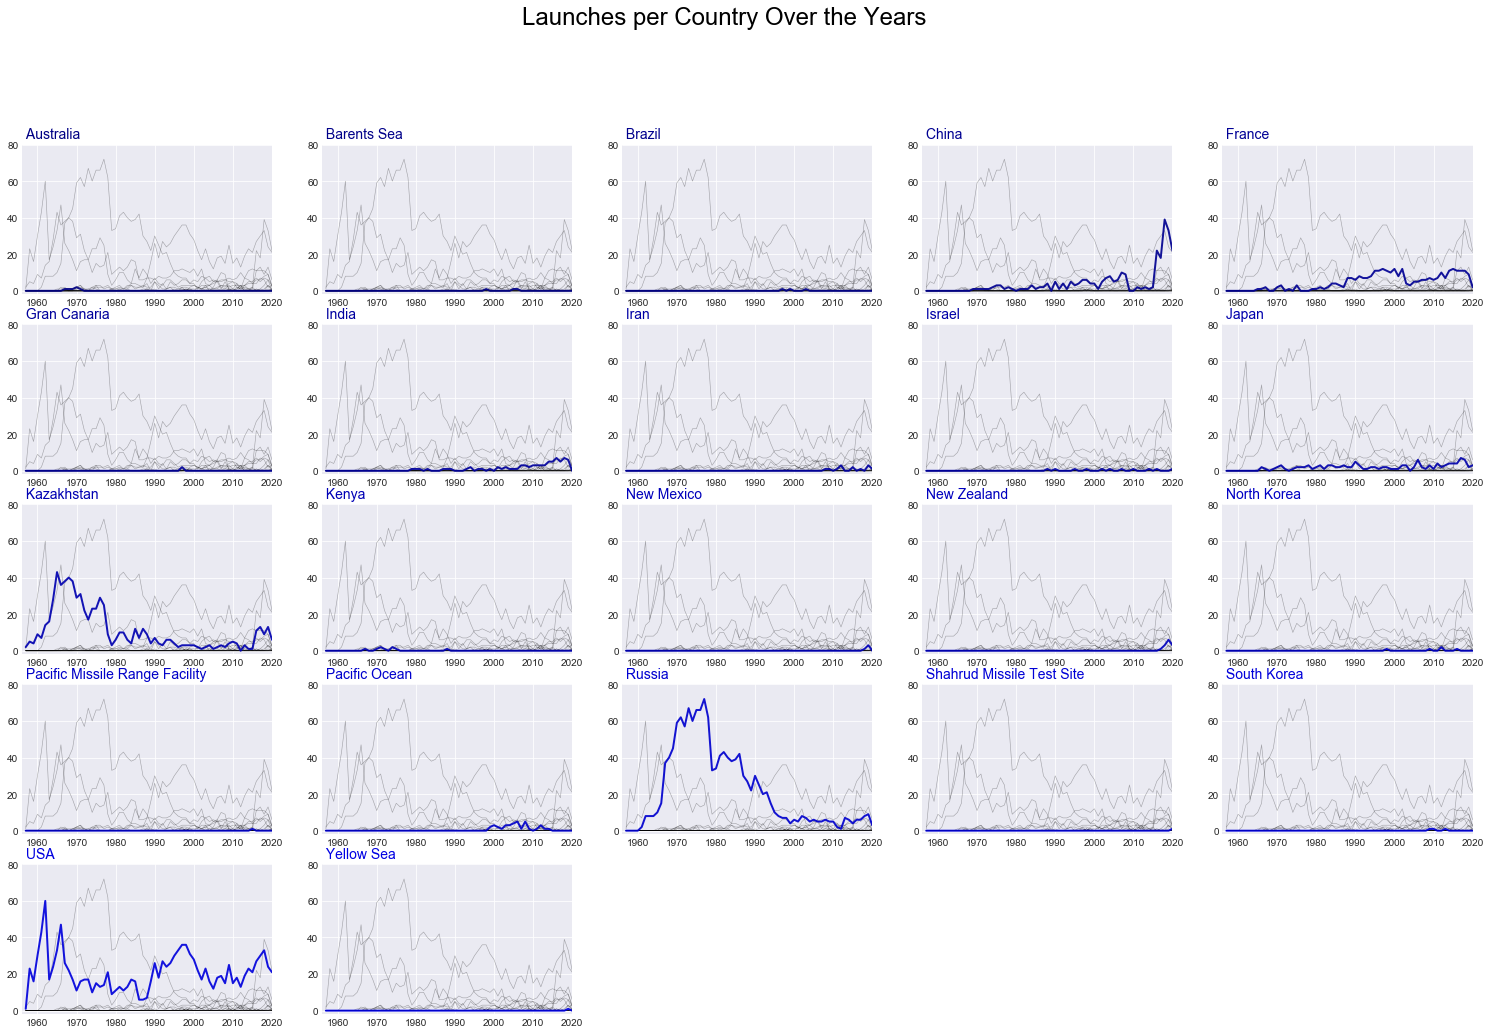

In [211]:
country_by_year = space.groupby(['Country', 'Year'])['Date & Time'].count().unstack('Country').fillna(0)

fig = plt.figure(figsize=(26,16))

# Initialize the figure
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('jet')

# multiple line plot

num = 0
for column in country_by_year:
    num += 1

    # Find the right spot on the plot
    plt.subplot(5,5,num)
    # plot every groups, but discreet
    for v in country_by_year:
        plt.plot(country_by_year.index, country_by_year[v], marker = '', color = 'black', linewidth=0.6, alpha=0.3)

    # Plot the lineplot
    plt.plot(country_by_year.index, country_by_year[column], marker = '', color = palette(num), 
             linewidth = 2.0, alpha=0.9, label = column)

    # Same limits for everybody!
    plt.xlim(1956,2020)
    plt.ylim(-2,80)

       # Add title
    plt.title(column, loc = 'left', fontsize = 14, fontweight = 3, color = palette(num) )

# general title
plt.suptitle("Launches per Country Over the Years", fontsize = 24, fontweight = 2, color = 'black', style = 'normal', y = 1.0)
plt.show()



..............................................................................................................................................................................................................................................................

## Space mission status per country

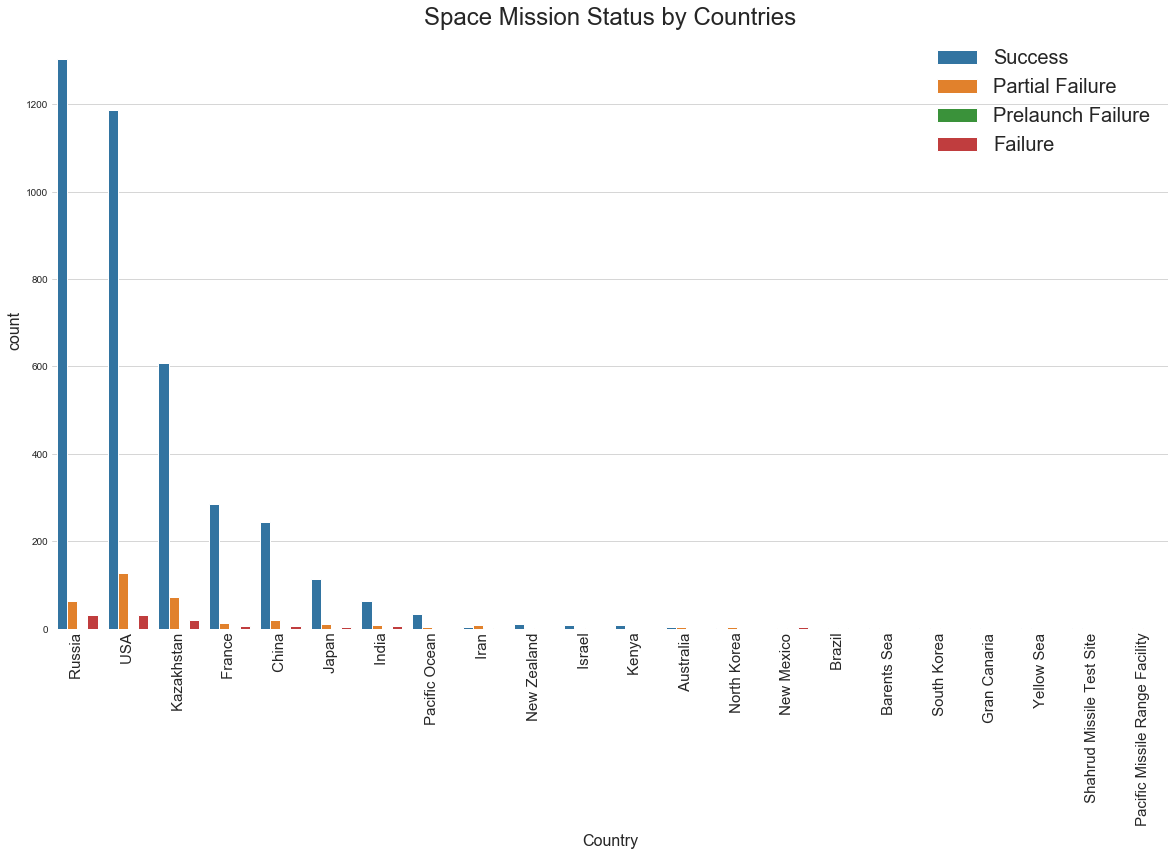

In [334]:
plt.figure(figsize=(20,11))
mission_status_dict = {'Success':1,'Partial Failure':2,'Prelaunch Failure':3,'Failure':4}
ax = sns.countplot(space['Country'],palette='tab10',order=space['Country'].value_counts().index,hue=space['Mission Status'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
ax.set_xlabel(ax.get_xlabel(),fontsize=16)
ax.set_ylabel(ax.get_ylabel(),fontsize=16)
ax.set_title('Space Mission Status by Countries',fontsize=24)
plt.legend(labels = mission_status_dict.keys(),loc = 1,prop = {'size':20})
plt.show()

## Rocket status by country

In [363]:
rocket_status_by_country = space.groupby('Country')['Current Status of Rocket'].value_counts().unstack('Current Status of Rocket').fillna(0).sort_values(by = 'Country', ascending = True)
rocket_status_by_country

Current Status of Rocket,StatusActive,StatusRetired
Country,,
Australia,0.0,6.0
Barents Sea,0.0,3.0
Brazil,3.0,0.0
China,223.0,45.0
France,113.0,190.0
Gran Canaria,2.0,0.0
India,50.0,26.0
Iran,9.0,4.0
Israel,5.0,6.0


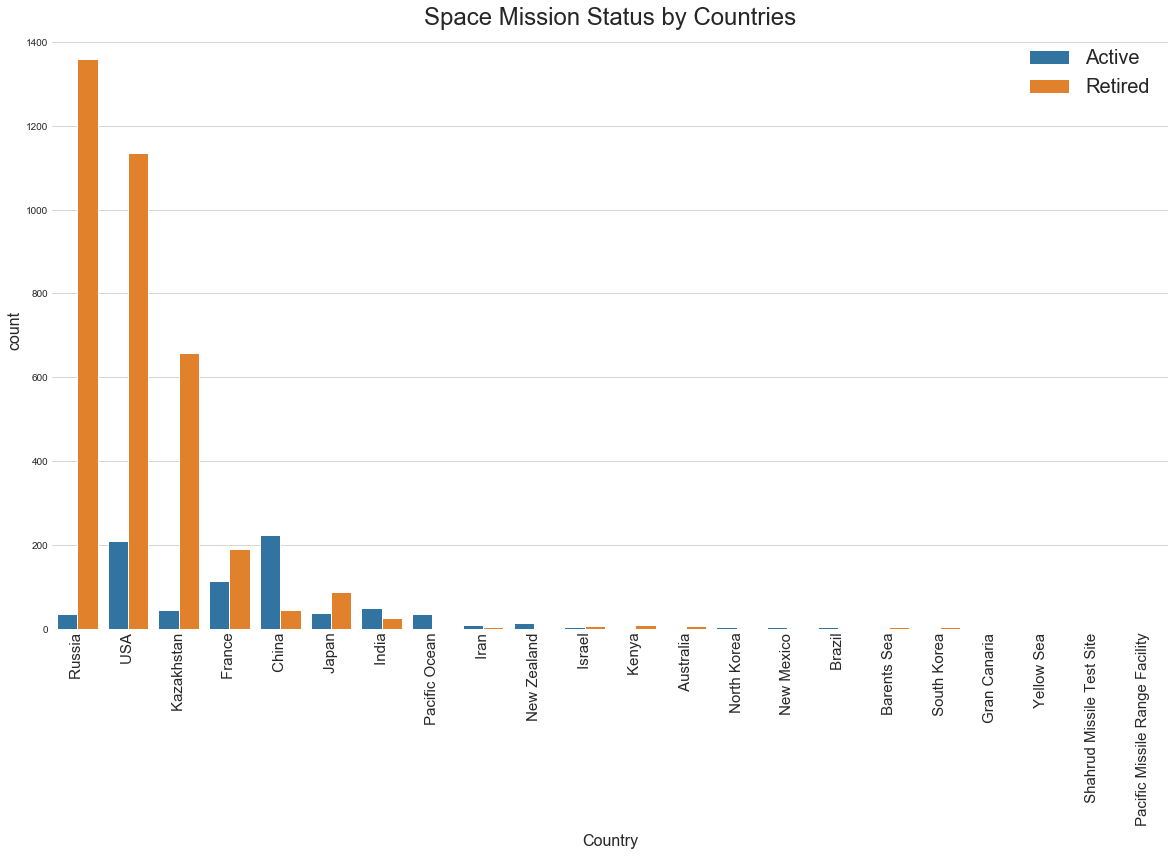

In [338]:
plt.figure(figsize=(20,11))
rocket_status_dict = {'Active':1,'Retired':2}
ax = sns.countplot(space['Country'],palette='tab10',order=space['Country'].value_counts().index,
                   hue=space['Current Status of Rocket'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
ax.set_xlabel(ax.get_xlabel(),fontsize=16)
ax.set_ylabel(ax.get_ylabel(),fontsize=16)
ax.set_title('Space Mission Status by Countries',fontsize=24)
plt.legend(labels = rocket_status_dict.keys(),loc = 1,prop = {'size':20})
plt.show()

## Top 10 space companies

In [355]:
top_10_space_company = space['Company Name'].value_counts()[:10]
top_10_space_company

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Company Name, dtype: int64

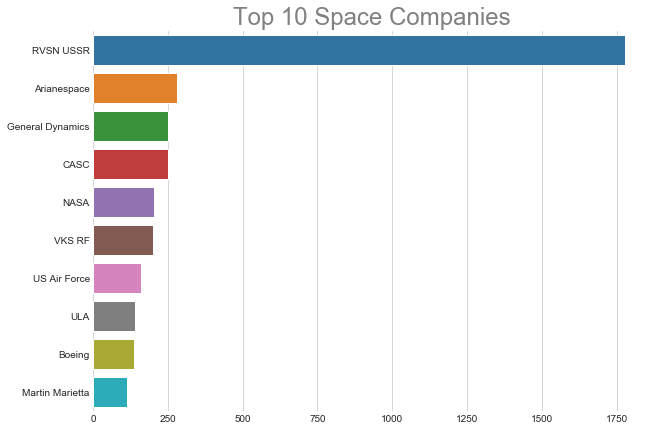

In [356]:
fig = plt.figure(figsize = (10,7))
sns.barplot(x=top_10_space_company.values, y=top_10_space_company.index)
plt.title('Top 10 Space Companies', size = 24, color = 'grey')
plt.show()